In [ ]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import json
import time
import re

#Business Insider

In [ ]:
url = "https://www.businessinsider.in/international/news/23"
source = requests.get(url).text
soup = BeautifulSoup(source, 'html.parser')

In [ ]:
print(soup.prettify())

<!DOCTYPE html>
<html xmlns:ext="http://exslt.org/common" xmlns:str="http://exslt.org/strings">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <title>
   Page 23: International News - read latest and trending International news and headlines
  </title>
  <meta content="Wednesday, 31 January, 2024  08:51:20PM" http-equiv="Last-Modified"/>
  <meta content="Page 23: International News - read breaking and trending International news, stories, headlines. Business insider India is providing latest, handpicked stories related to the International category." name="description"/>
  <meta content="International news" name="keywords"/>
  <meta content="NOODP" name="robots"/>
  <link href="https://www.businessinsider.in/international/news/22" rel="prev"/>
  <link href="https://www.businessinsider.in/international/news/24" rel="next"/>
  <link href="https://www.businessinsider.in/international/news/23" rel="canonical">
   <link href="//www.google-analytics.com" rel

In [ ]:
import json
from bs4 import BeautifulSoup
import requests

url = "https://www.businessinsider.in/international/news/23"
source = requests.get(url).text
soup = BeautifulSoup(source, 'html.parser')

# Find the specific script containing the URLs based on context or other attributes
target_script = None
for script in soup.find_all('script', {'type': 'application/ld+json'}):
    if '"@type" : "ItemList"' in script.text:
        target_script = script
        break

if target_script:
    # Extract the JSON-like data
    script_content = target_script.contents[0].strip()

    # Load JSON data
    data = json.loads(script_content)

    # Extract the URLs from the JSON data
    urls = [
        item['url']
        for item in data.get('itemListElement', [])
    ]

    # Print the URLs with their indices
    for index, url in enumerate(urls, start=1):
        print(f"{index}. {url}")
else:
    print("Target script not found.")


1. https://www.businessinsider.in/international/news/ukrainian-partisans-say-they-killed-24-russian-soldiers-in-crimea-after-poisoning-their-vodka-with-arsenic-and-strychnine/articleshow/105762934.cms
2. https://www.businessinsider.in/international/news/ukraine-is-using-its-advanced-leopard-tanks-like-long-range-artillery-instead-of-penetrating-battle-vehicles-report-says/articleshow/105759749.cms
3. https://www.businessinsider.in/international/news/at-least-30-american-troops-have-died-in-a-spate-of-us-military-helicopter-and-tiltrotor-aircraft-crashes-this-year/articleshow/105762535.cms
4. https://www.businessinsider.in/international/news/ukraine-launched-a-barrage-of-attack-drones-at-crimea-overnight-russia-says/articleshow/105762258.cms
5. https://www.businessinsider.in/international/news/few-things-worry-nato-like-russias-yasen-class-submarines-and-moscow-may-be-planning-to-build-even-more-of-them/articleshow/105761654.cms
6. https://www.businessinsider.in/international/news/israe

In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import json

bi_dict1 = {}
i=0
# Assuming filtered_href_values is a list of href values

for idx in range(1, 23): #as it contains till december i.e one month
    url1 = f"https://www.businessinsider.in/international/news/{idx}"
    source = requests.get(url1).text
    soup = BeautifulSoup(source, 'html.parser')

    # Initialize a list to store text values for the current iteration
    a = []

    # Find the specific script containing the URLs based on context or other attributes
    target_script = None
    for script in soup.find_all('script', {'type': 'application/ld+json'}):
        if '"@type" : "ItemList"' in script.text:
            target_script = script
            break

    if target_script:
        # Extract the JSON-like data
        script_content = target_script.contents[0].strip()

        # Load JSON data
        data = json.loads(script_content)

        # Extract the URLs from the JSON data
        urls = [
            item['url']
            for item in data.get('itemListElement', [])
        ]

        # Print the URLs with their indices
        for index, url in enumerate(urls, start=1):
            print(f"{index}. {url}")
            bi_dict1[i]=url
            i += 1
    else:
        print("Target script not found.")

Target script not found.
1. https://www.businessinsider.in/international/news/a-woman-in-china-has-decided-to-leave-her-2-8m-fortune-to-her-dogs-and-cats-and-nothing-to-her-children-says-report/articleshow/107209472.cms
2. https://www.businessinsider.in/international/news/us-special-operations-forces-are-searching-for-a-new-extreme-long-range-rifle-for-their-next-big-fight-as-ukraine-shows-the-damage-that-snipers-can-do/articleshow/107208442.cms
3. https://www.businessinsider.in/international/news/i-dont-mind-giving-my-kids-screen-time-but-teaching-them-how-to-find-what-they-want-is-time-consuming-and-frustrating-/articleshow/107207474.cms
4. https://www.businessinsider.in/international/news/kremlin-denies-report-that-putin-reached-out-to-the-us-about-talks-on-ending-the-war-in-ukraine/articleshow/107206371.cms
5. https://www.businessinsider.in/international/news/russia-is-changing-tactics-to-try-to-capture-the-city-of-avdiivka-and-plans-to-fight-through-it-block-by-block-isw-says/arti

In [ ]:
bi_dict1[0]

'https://www.businessinsider.in/international/news/a-woman-in-china-has-decided-to-leave-her-2-8m-fortune-to-her-dogs-and-cats-and-nothing-to-her-children-says-report/articleshow/107209472.cms'

In [ ]:
# Filter URLs containing the word "Hamas" (case-insensitive)
filtered_urls = {key: value for key, value in bi_dict1.items() if 'hamas' in value.lower()}

# Create a new dictionary with consecutive integer keys
filtered_urls_dict = {i + 1: url for i, url in enumerate(filtered_urls.values())}

# Print the filtered URLs with new keys
for key, value in filtered_urls_dict.items():
    print(f"{key}. {value}")

1. https://www.businessinsider.in/international/news/hamas-inflicted-a-huge-loss-on-israel-killing-21-soldiers-with-a-single-devastating-rpg-shot/articleshow/107089690.cms
2. https://www.businessinsider.in/international/news/israeli-military-leaders-say-israel-has-a-choice-defeat-hamas-or-save-the-hostages/articleshow/107062261.cms
3. https://www.businessinsider.in/international/news/10-year-old-boy-hospitalized-after-being-attacked-by-a-shark-during-a-shark-tank-expedition-in-the-bahamas/articleshow/106913794.cms
4. https://www.businessinsider.in/international/news/photos-show-subdued-christmas-celebrations-in-the-west-bank-town-of-bethlehem-amid-the-israel-hamas-war/slidelist/106800055.cms
5. https://www.businessinsider.in/international/news/hamasapos-oct-7-terror-attacks-left-destruction-in-their-wake-see-photos-of-what-israeli-citizens-left-behind-/slidelist/106786401.cms
6. https://www.businessinsider.in/international/news/the-3000-year-history-of-tunnel-warfare-shows-how-hard-ita

In [ ]:
bi_dict = {}

# Assuming filtered_urls_dict is a dictionary with indices as keys and URLs as values

for idx, url in filtered_urls_dict.items():
    # Fetch HTML content
    source = requests.get(url).text
    soup = BeautifulSoup(source, 'html.parser')

    # Initialize a list to store text values for the current iteration
    a = []

    # Find the script tag with the id '__NEXT_DATA__'
    script_tags = soup.find_all('script', type='application/ld+json')
    for script_tag in script_tags:
        try:
            json_data = json.loads(script_tag.string)
            text_data = json_data.get('articleBody', '')

            # Append the "text" values to the list
            if isinstance(text_data, str):
                a.append(text_data)

        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")

    # Now, 'a' contains the stored text values for the current iteration
    print(f"Stored Text Values in 'a' for iteration {idx}:")
    for text_value in a:
        bi_dict.setdefault(idx, []).append(text_value)


Stored Text Values in 'a' for iteration 1:
Stored Text Values in 'a' for iteration 2:
Stored Text Values in 'a' for iteration 3:
Stored Text Values in 'a' for iteration 4:
Stored Text Values in 'a' for iteration 5:
Stored Text Values in 'a' for iteration 6:
Stored Text Values in 'a' for iteration 7:
Stored Text Values in 'a' for iteration 8:
Stored Text Values in 'a' for iteration 9:
Stored Text Values in 'a' for iteration 10:
Stored Text Values in 'a' for iteration 11:
Stored Text Values in 'a' for iteration 12:
Stored Text Values in 'a' for iteration 13:
Stored Text Values in 'a' for iteration 14:
Stored Text Values in 'a' for iteration 15:
Stored Text Values in 'a' for iteration 16:
Stored Text Values in 'a' for iteration 17:
Stored Text Values in 'a' for iteration 18:
Stored Text Values in 'a' for iteration 19:


In [ ]:
bi_dict[2]

['',
 '',
 "Top Israeli military officials say defeating Hamas could come at the cost of the lives of hostages.Some officials told NYT they don't think Israel's two goals are both feasible.High-ranking Israeli military officials are increasingly concerned that if Israel has any hope of defeating Hamas, it may have to do so at the cost of the lives of remaining Israeli hostages in Gaza, The New York Times reported.The Times reported that some Israeli commanders are worried the country's twin goals of destroying Hamas and freeing the hostages are not both feasible.Instead, The Times reported, some Israeli military officials believe that Israel may have to use diplomatic channels — as opposed to military strategy — to recover the hostages from Gaza.Israel vowed to annihilate Hamas after the militant group in October carried out the worst terrorist attack on Israeli soil in the nation's history, killing nearly 1,200 people and taking more than 200 civilians hostage.The Israeli armed forces

##TIME

In [ ]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import json

In [ ]:
url = "https://time.com/tag/israel-hamas-war/?page=5"
source = requests.get(url).text
soup = BeautifulSoup(source, 'html.parser')

In [ ]:
print(soup.prettify())

<!DOCTYPE html>
<!--
:////////////////////////: ..-////-..        .//`                 :/-        ..-///////////////////-
-`````````.////.`````````:   `////.          -///                -///           ////-`````````````.-
-         .////.         -   `////.          ////:              .////`          ////-              -
          .////.             `////.         `/////-            `/////-          ////-
          .////.             `////.         ://////.          `///////          ////-
          .////.             `////.         //..////.         :/:-////.         ////-           `.
          .////.             `////.        .//` :////.       :/: `////:         ////:..........:-
          .////.             `////.        //:   :////`     -/:`  -////`        ////:...........:-
          .////.             `////.       `//`    :////`   -//`   `////-        ////-           `.
          .////.             `////.       ://     `/////` -//`     :////        ////-
          .////.       

In [ ]:
# Assuming 'soup' contains your BeautifulSoup object

links = soup.find_all('a', href=lambda href: href and re.match(r'^/\d', href))

# Initialize an empty list to store the complete URLs
complete_urls = []

# Prepend "https://time.com" and add the complete URLs to the list
for link in links:
    complete_url = 'https://time.com' + link['href']
    complete_urls.append(complete_url)

# Print or further process the list of complete URLs
print(complete_urls)


['https://time.com/6432223/biden-meeting-american-hamas-hostage-families/', 'https://time.com/6384946/biden-netanyahu-zionist-zelensky/', 'https://time.com/6344698/global-strike-gaza-ceasefire/', 'https://time.com/6344552/blinken-congress-israel-weapons-deal-ukraine-aid/', 'https://time.com/6344541/gaza-fighting-rages-israel-renewed-us-support/', 'https://time.com/6344440/us-vetoes-un-resolution-gaza-ceasefire-backlash/', 'https://time.com/6344430/israel-hamas-war-iran-nuclear-breakout/', 'https://time.com/6344171/hanukkah-miracle-resistance-essay/', 'https://time.com/6343572/common-ground-between-israelis-palestinians/', 'https://time.com/6342114/israel-hamas-war-ceasefire-hostages-families/', 'https://time.com/6343715/israel-hamas-war-journalists-gaza/', 'https://time.com/6343516/southern-gaza-fleeing-safety-essay/', 'https://time.com/6343347/us-visa-bans-israeli-settlers-west-bank/', 'https://time.com/6342831/israelis-palestinians-nation-builders/', 'https://time.com/6342821/israel-

In [ ]:
url = "https://time.com/6343715/israel-hamas-war-journalists-gaza/"
source = requests.get(url).text
soup = BeautifulSoup(source, 'html.parser')

In [ ]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link as="font" crossorigin="" href="/_next/static/media/010f47b240fbdab5-s.p.otf" rel="preload" type="font/otf"/>
  <link as="font" crossorigin="" href="/_next/static/media/0e4fe491bf84089c-s.p.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="" href="/_next/static/media/1d6159b7489fdf23-s.p.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="" href="/_next/static/media/26de8d18dde0c48f-s.p.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="" href="/_next/static/media/2b0140c2962edc97-s.p.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="" href="/_next/static/media/52db2a4aafb407ce-s.p.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="" href="/_next/static/media/5bb441026facce1b-s.p.woff2" rel="preload" type="font/woff2"/>
  <link as="font" 

In [ ]:
# Find all 'p' tags with the specified class
p_elements = soup.find_all('p', class_='self-baseline px-0 font-pt-serif text-17px leading-7 tracking-0.5px')

# Extract and print the text content from all 'p' elements
for p_element in p_elements:
    text_content = p_element.get_text(strip=True)
    print(text_content)

For weeks, Motaz Azaiza’sInstagram feedhas exclusively borne witness to the horrors unfolding in Gaza. Since Oct. 7, the 24-year-old photojournalist has dedicated his days to capturing the scenes of death, destruction, and anguish that have come to be associated with the besieged enclave.
But as Israel’s punishing military campaign to root out Hamas from the Strip enters its third month, and as its ground invasion pushes further south to where millions of civilians are currently sheltering, Azaiza has warned that he may not be able to continue his work for much longer. “The phase of risking your life to show what is happening is now over,” he told his followers in astatementover the weekend, “and the phase of trying to survive has started.”
The fate of journalists like Azaiza matters—not only for Gaza’s Palestinians, many of whom have come to rely on their local press to report what is happening to a world that increasingly feels out of reach, but for the wider international press, whi

In [ ]:
time_dict1 = {}
i = 0

# Assuming filtered_href_values is a list of href values
for idx in range(2, 6):  # as it contains till December i.e one month
    url1 = f"https://time.com/tag/israel-hamas-war/?page={idx}"
    source = requests.get(url1).text
    soup = BeautifulSoup(source, 'html.parser')

    # Find all 'a' tags with href starting with "/" and followed by a number
    links = soup.find_all('a', href=lambda href: href and re.match(r'^/\d', href))

    # Prepend "https://time.com" and print the complete URLs
    # Initialize an empty list to store the complete URLs
    complete_urls = []

    # Prepend "https://time.com" and add the complete URLs to the list
    for link in links:
        complete_url = 'https://time.com' + link['href']
        complete_urls.append(complete_url)

    # Extract the URLs from the list
    urls = [
        item for item in complete_urls
    ]

    # Print the URLs with their indices
    for index, url in enumerate(urls, start=1):
        print(f"{index}. {url}")
        time_dict1[i] = url
        i += 1
else:
    print("Target script not found.")


1. https://time.com/6564983/saudi-arabia-israel-palestinian-state/
2. https://time.com/6564827/israeli-hostages-call-to-action-davos-encounter/
3. https://time.com/6564776/women-children-victims-israel-hamas-united-nations/
4. https://time.com/6564535/gaza-ukraine-davos-world-economic-forum/
5. https://time.com/6552304/israel-united-nations-us/
6. https://time.com/6559293/morning-consult-israel-global-opinion/
7. https://time.com/6556113/curiosity-propaganda-hala-alyan-essay/
8. https://time.com/6556358/israel-hamas-war-hostages-qatar-france-send-medicine/
9. https://time.com/6556311/houthi-specially-designated-global-terrorists-us/
10. https://time.com/6556020/malta-flagged-carrier-hit-by-missile-as-houthi-red-sea-shipping-attacks-continue/
11. https://time.com/6555620/us-strikes-houthis-yemen/
12. https://time.com/6555634/houthi-yemen-missile-american-cargo/
13. https://time.com/6555577/hamas-israeli-hostages-video/
14. https://time.com/6555453/sagiv-jehezkel-antalyaspor-turkey-socce

In [ ]:
len(time_dict1)

80

In [ ]:
time_dict1[1]

'https://time.com/6564827/israeli-hostages-call-to-action-davos-encounter/'

In [ ]:
time_dict = {}

# Assuming filtered_urls_dict is a dictionary with indices as keys and URLs as values

for idx, url in time_dict1.items():
    # Fetch HTML content
    source = requests.get(url).text
    soup = BeautifulSoup(source, 'html.parser')

    # Initialize a list to store text values for the current iteration
    a = []

    # Find the script tag with the id '__NEXT_DATA__'
    p_elements = soup.find_all('p', class_='self-baseline px-0 font-pt-serif text-17px leading-7 tracking-0.5px')
    for p_element in p_elements:
        try:
            text_content = p_element.get_text(strip=True)

            # Append the "text" values to the list
            if isinstance(text_content, str):
                a.append(text_content)

        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")

    # Now, 'a' contains the stored text values for the current iteration
    print(f"Stored Text Values in 'a' for iteration {idx}:")
    for text_value in a:
        time_dict.setdefault(idx, []).append(text_value)


Stored Text Values in 'a' for iteration 0:
Stored Text Values in 'a' for iteration 1:
Stored Text Values in 'a' for iteration 2:
Stored Text Values in 'a' for iteration 3:
Stored Text Values in 'a' for iteration 4:
Stored Text Values in 'a' for iteration 5:
Stored Text Values in 'a' for iteration 6:
Stored Text Values in 'a' for iteration 7:
Stored Text Values in 'a' for iteration 8:
Stored Text Values in 'a' for iteration 9:
Stored Text Values in 'a' for iteration 10:
Stored Text Values in 'a' for iteration 11:
Stored Text Values in 'a' for iteration 12:
Stored Text Values in 'a' for iteration 13:
Stored Text Values in 'a' for iteration 14:
Stored Text Values in 'a' for iteration 15:
Stored Text Values in 'a' for iteration 16:
Stored Text Values in 'a' for iteration 17:
Stored Text Values in 'a' for iteration 18:
Stored Text Values in 'a' for iteration 19:
Stored Text Values in 'a' for iteration 20:
Stored Text Values in 'a' for iteration 21:
Stored Text Values in 'a' for iteration 22

In [ ]:
time_dict[16] #random check

['The U.S. and U.K. launched strikes attacking multiple Houthi rebel targets in Yemen on Thursday, Jan. 11, marking a significant escalation in the broader conflict of the Middle East. In October, shortly after the start of theIsrael-Hamas war, the Houthis began launching missile attacks at cargo ships passing through the Red Sea, headed towards Israeli ports.',
 'Here’s what you need to know about Yemen’s Houthi rebels and their place in the current conflict.',
 'The Houthi rebels are one of two main factions controlling territory amidst Yemen’s ongoing civil war. Currently, they control the Western coast of the country, including its capital city, Sana’a.',
 'The Houthis initially began as a cultural revivalist movement in the 1990s for the Zaydi sect of Islam which, as of 2022, was practiced by approximately35% of the Yemeni population. According to Stacey Philbrick Yadav, the chair of international relations at Hobart and William Smith Colleges and author ofYemen in the Shadow of T

##Telegraph

In [ ]:
#one random page
url = "https://www.telegraphindia.com/world/page-53"
source = requests.get(url).text
soup = BeautifulSoup(source, 'html.parser')

In [ ]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <script>
   (function (w, d, s, l, i) {
        w[l] = w[l] || [];
        w[l].push({
            'gtm.start':
                new Date().getTime(), event: 'gtm.js'
        });
        var f = d.getElementsByTagName(s)[0],
            j = d.createElement(s), dl = l != 'dataLayer' ? '&l=' + l : '';
        j.async = true;
        j.src =
            'https://www.googletagmanager.com/gtm.js?id=' + i + dl;
        f.parentNode.insertBefore(j, f);
    })(window, document, 'script', 'dataLayer', 'GTM-T9HRQZR');

    
    var THIS_PAGE_NAME = 'sectionpage';
  </script>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <title>
   World News Today - Latest International News, World News Headlines - Telegraph India
  </title>
  <meta content="World News- Get latest international top news headlines from around the world. Find the breaking news, 

In [ ]:
# Assuming 'soup' contains your BeautifulSoup object

# Find all 'a' tags with href starting with '/world' and containing 'cid'
links = soup.find_all('a', href=lambda href: href and re.match(r'^/world', href) and 'cid' in href)

# Initialize an empty list to store the complete URLs
complete_urls = []

# Prepend "https://www.telegraphindia.com" and add the complete URLs to the list
for link in links:
    complete_url = 'https://www.telegraphindia.com' + link['href']
    complete_urls.append(complete_url)

# Print or further process the list of complete URLs
print(complete_urls)


['https://www.telegraphindia.com/world/israeli-forces-and-hamas-fighters-engage-in-house-to-house-gunbattles-in-khan-younis/cid/1985099', 'https://www.telegraphindia.com/world/president-joe-biden-condemns-sexual-violence-of-hamas-during-october-7-attack/cid/1985101', 'https://www.telegraphindia.com/world/we-take-this-issue-very-seriously-us-waits-to-see-results-on-hit-job-probe/cid/1985071', 'https://www.telegraphindia.com/world/uks-family-visa-crackdown-to-impact-many-indian-family-plans/cid/1985050', 'https://www.telegraphindia.com/world/nobel-laureate-malala-yousafzai-calls-for-making-gender-apartheid-a-crime-against-humanity/cid/1985014', 'https://www.telegraphindia.com/world/israeli-military-regrets-casualties-in-inadvertent-attack-that-harmed-lebanese-troops/cid/1985016', 'https://www.telegraphindia.com/world/26-year-old-indian-man-dies-in-car-crash-in-australia-wife-appeals-for-help-to-send-his-remains-back-home/cid/1984976', 'https://www.telegraphindia.com/world/released-israel

In [ ]:
print("Number of URLs:", len(complete_urls)) #single page contains 16-18 urls

Number of URLs: 19


In [ ]:
#check one random url
url = "https://www.telegraphindia.com/world/dubai-india-proposes-to-host-un-climate-conference-in-2028-launches-green-credit-initiative/cid/1983912"
source = requests.get(url).text
soup = BeautifulSoup(source, 'html.parser')

In [ ]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <script>
   (function (w, d, s, l, i) {
        w[l] = w[l] || [];
        w[l].push({
            'gtm.start':
                new Date().getTime(), event: 'gtm.js'
        });
        var f = d.getElementsByTagName(s)[0],
            j = d.createElement(s), dl = l != 'dataLayer' ? '&l=' + l : '';
        j.async = true;
        j.src =
            'https://www.googletagmanager.com/gtm.js?id=' + i + dl;
        f.parentNode.insertBefore(j, f);
    })(window, document, 'script', 'dataLayer', 'GTM-T9HRQZR');

    
    var THIS_PAGE_NAME = 'regular';
  </script>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <title>
   Dubai | Dubai: India proposes to host UN climate conference in 2028, launches Green Credit Initiative - Telegraph India
  </title>
  <meta content="At COP28, PM Modi proposes Green Credit Initiative which focuses on crea

In [ ]:
# Find all <p> tags and extract the text content
paragraphs = soup.find_all('p')

# Print the text content
for paragraph in paragraphs:
    print(paragraph.get_text())

Prime Minister Narendra Modi speaks during a plenary session at the COP28 U.N. Climate Summit.
                                                                    PTI picture.

Asserting that the world does not have much time to correct the mistakes of the last century, Prime Minister Narendra Modi on Friday announced a ‘Green Credit Initiative’ focused on creating carbon sinks through people's participation and also proposed to host the UN climate conference in 2028, or COP33, in India.
Addressing the high-level segment for heads of state and governments during the UN climate conference (COP28) here, Modi called for a pro-planet proactive and positive initiative and said the Green Credits Initiative goes beyond the commercial mindset associated with carbon credits.
"It focuses on creating carbon sinks through people's participation and I invite all of you to join this initiative," he said, stressing that the world does not have much time to correct the mistakes of the last century.
Th

#Iteratting over pages to get links

In [ ]:
import requests
from bs4 import BeautifulSoup
import re

telegraph_dict= {}
i = 0

# Assuming filtered_href_values is a list of href values
for idx in range(1, 53):  # as it contains till December i.e one month
    url1 = f"https://www.telegraphindia.com/world/page-{idx}"
    source = requests.get(url1).text
    soup = BeautifulSoup(source, 'html.parser')

    # Find all 'a' tags with href starting with "/" and followed by a number
    links = soup.find_all('a', href=lambda href: href and re.match(r'^/world', href) and 'cid' in href)

    # Prepend "https://time.com" and print the complete URLs
    # Initialize an empty list to store the complete URLs
    complete_urls = []

    # Prepend "https://time.com" and add the complete URLs to the list
    for link in links:
        complete_url = 'https://www.telegraphindia.com' + link['href']
        complete_urls.append(complete_url)

    # Extract the URLs from the list
    urls = [
        item for item in complete_urls
    ]

    # Print the URLs with their indices
    for index, url in enumerate(urls, start=1):
        print(f"{index}. {url}")
        telegraph_dict[i] = url
        i += 1
else:
    print("Target script not found.")


1. https://www.telegraphindia.com/world/pakistan-media-regulatory-body-ordered-to-provide-unrestricted-media-coverage-to-imran-khan-other-candidates/cid/1997430
2. https://www.telegraphindia.com/world/united-states-navy-destroyer-shoots-down-houthi-claimed-missile-in-red-sea/cid/1997429
3. https://www.telegraphindia.com/world/10000-indian-construction-workers-to-reach-israel-soon-in-batches-starting-next-week/cid/1997413
4. https://www.telegraphindia.com/world/main-opposition-in-maldives-accuses-president-mohamed-muizzu-of-protecting-criminals-after-attack-on-prosecutor-general/cid/1997386
5. https://www.telegraphindia.com/world/coroners-office-suspect-no-foul-play-in-indian-origin-purdue-university-students-death-report/cid/1997395
6. https://www.telegraphindia.com/world/israeli-soldiers-dressed-in-medical-gear-kill-a-hamas-commander-two-others-at-a-west-bank-hospital/cid/1997381
7. https://www.telegraphindia.com/world/president-joe-biden-says-hes-decided-on-response-to-killing-of-3-u

# Filter URLs containing both "Hamas" and "Israel"

In [ ]:
# Filter URLs containing both "Hamas" and "Israel" (case-insensitive)
filtered_urls = {key: value for key, value in telegraph_dict.items() if 'hamas' in value.lower() or 'israel' in value.lower()}

# Create a new dictionary with consecutive integer keys
filtered_urls_dict = {i + 1: url for i, url in enumerate(filtered_urls.values())}

# Print the filtered URLs with new keys
for key, value in filtered_urls_dict.items():
    print(f"{key}. {value}")


1. https://www.telegraphindia.com/world/10000-indian-construction-workers-to-reach-israel-soon-in-batches-starting-next-week/cid/1997413
2. https://www.telegraphindia.com/world/israeli-soldiers-dressed-in-medical-gear-kill-a-hamas-commander-two-others-at-a-west-bank-hospital/cid/1997381
3. https://www.telegraphindia.com/world/israeli-prime-minister-benjamin-netanyahu-rules-out-gaza-pullout-and-release-of-thousands-of-jailed-militants/cid/1997257
4. https://www.telegraphindia.com/world/undercover-attack-kills-3-militants-israeli-troops-disguised-as-women-storm-hospital/cid/1997256
5. https://www.telegraphindia.com/world/israeli-pm-benjamin-netanyahu-rules-out-gaza-pullout-or-release-of-thousands-of-militants/cid/1997242
6. https://www.telegraphindia.com/world/israel-expresses-gratefulness-for-indias-friendship-and-support-discusses-regional-security-issues/cid/1997104
7. https://www.telegraphindia.com/world/israeli-intelligence-dossier-showcases-involvement-of-un-staffs-in-militant-grou

In [ ]:
tg_dict = {}

# Assuming filtered_urls_dict is a dictionary with indices as keys and URLs as values

for idx, url in filtered_urls_dict.items():
    # Fetch HTML content
    source = requests.get(url).text
    soup = BeautifulSoup(source, 'html.parser')

    # Initialize a list to store text values for the current iteration
    a = []

    # Find the script tag with the id '__NEXT_DATA__'
    paragraphs = soup.find_all('p')

    # Print the text content
    for paragraph in paragraphs:
        print(paragraph.get_text())
        try:
            text_content = paragraph.get_text()

            # Append the "text" values to the list
            if isinstance(text_content, str):
                a.append(text_content)

        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")

    # Now, 'a' contains the stored text values for the current iteration
    print(f"Stored Text Values in 'a' for iteration {idx}:")
    for text_value in a:
        tg_dict.setdefault(idx, []).append(text_value)


Representational image.
                                                                    Shutterstock

With Israel's construction sector suffering a severe manpower crisis post the October 7 conflict with Hamas, some 10,000 workers from India are to make their way here starting next week, industry sources said on Wednesday.
 These 10,000 workers will reach in batches of 700 to 1,000 a week, a source in the Israel's Builders Association (IBA) told PTI here.
 With Israel's latest conflict with Hamas in Gaza a little short of four months, and a ban on the entry of Palestinian workers and the departure of several thousand other foreign workers, the Israeli construction industry has been facing a deep crisis and several ongoing projects are getting either stalled or delayed.
 Following the conflict, Israel has banned the entry of Palestinian workers. The departure of several thousand other foreign workers, the Israeli construction industry has been facing a deep crisis.
 Israeli business

In [ ]:
tg_dict[11]

['Israeli Prime Minister Benjamin Netanyahu\n                                                                    File image\n',
 'Israeli Prime Minister Benjamin Netanyahu welcomed a decision by the World Court on Friday not to order a ceasefire in the war in Gaza but rejected a charge of genocide as “outrageous”, and said it would continue to defend itself.',
 'The World Court ordered Israel to take action to prevent acts of genocide as it wages war against Hamas militants in the Gaza Strip, but it stopped short of calling for an immediate ceasefire.',
 "On the court's demand that Israel try to contain death and damage in its military offensive in the tiny coastal enclave, Israel says it seeks to protect citizens in Gaza and also accuses Hamas of using Palestinians as human shields — an accusation that Hamas denies.",
 'It says it must have the right to defend itself after Hamas’ cross-border attack on October 7 that killed 1,200 people.',
 'Responding to a case brought by South Afric

##Statesman


In [ ]:
url = "https://www.thestatesman.com/world/page/67"
source = requests.get(url).text
soup = BeautifulSoup(source, 'html.parser')

In [ ]:
print(soup.prettify())

<!DOCTYPE html>
<html class="no-js" lang="en">
 <head>
  <meta charset="utf-8"/>
  <script>
   if(navigator.userAgent.match(/MSIE|Internet Explorer/i)||navigator.userAgent.match(/Trident\/7\..*?rv:11/i)){var href=document.location.href;if(!href.match(/[?&]nowprocket/)){if(href.indexOf("?")==-1){if(href.indexOf("#")==-1){document.location.href=href+"?nowprocket=1"}else{document.location.href=href.replace("#","?nowprocket=1#")}}else{if(href.indexOf("#")==-1){document.location.href=href+"&nowprocket=1"}else{document.location.href=href.replace("#","&nowprocket=1#")}}}}
  </script>
  <script>
   class RocketLazyLoadScripts{constructor(){this.v="1.2.4",this.triggerEvents=["keydown","mousedown","mousemove","touchmove","touchstart","touchend","wheel"],this.userEventHandler=this._triggerListener.bind(this),this.touchStartHandler=this._onTouchStart.bind(this),this.touchMoveHandler=this._onTouchMove.bind(this),this.touchEndHandler=this._onTouchEnd.bind(this),this.clickHandler=this._onClick.bind(t

In [ ]:
# Assuming 'soup' is your BeautifulSoup object
world_links = [a['href'] for a in soup.find_all('a', href=lambda href: href and 'world' in href.lower() and 'https' in href and any(char.isdigit() for char in href) and 'page' not in href.lower())]

# Print or use the extracted links
for link in world_links:
    print(link)


https://www.thestatesman.com/world/saudi-arabia-to-host-largest-ever-un-conference-on-land-drought-1503265221.html
https://www.thestatesman.com/world/saudi-arabia-to-host-largest-ever-un-conference-on-land-drought-1503265221.html
https://www.thestatesman.com/world/everything-ok-says-maldives-envoy-on-ties-with-india-1503265207.html
https://www.thestatesman.com/world/everything-ok-says-maldives-envoy-on-ties-with-india-1503265207.html
https://www.thestatesman.com/world/indian-navy-in-joint-op-thwarts-hijacking-of-sri-lankan-fishing-vessel-1503265027.html
https://www.thestatesman.com/world/indian-navy-in-joint-op-thwarts-hijacking-of-sri-lankan-fishing-vessel-1503265027.html
https://www.thestatesman.com/world/prenatal-exposure-to-pm-2-5-may-up-severe-respiratory-distress-in-newborns-1503265032.html
https://www.thestatesman.com/world/prenatal-exposure-to-pm-2-5-may-up-severe-respiratory-distress-in-newborns-1503265032.html
https://www.thestatesman.com/world/australia-sees-40-rise-in-sexua

#checking one url

In [ ]:
url = "https://www.thestatesman.com/world/genocide-charge-against-israel-false-outrageous-prime-minister-benjamin-netanyahu-1503263746.html"
source = requests.get(url).text
soup = BeautifulSoup(source, 'html.parser')

In [ ]:
print(soup.prettify())

<!DOCTYPE html>
<html class="no-js" lang="en">
 <head>
  <meta charset="utf-8"/>
  <script>
   if(navigator.userAgent.match(/MSIE|Internet Explorer/i)||navigator.userAgent.match(/Trident\/7\..*?rv:11/i)){var href=document.location.href;if(!href.match(/[?&]nowprocket/)){if(href.indexOf("?")==-1){if(href.indexOf("#")==-1){document.location.href=href+"?nowprocket=1"}else{document.location.href=href.replace("#","?nowprocket=1#")}}else{if(href.indexOf("#")==-1){document.location.href=href+"&nowprocket=1"}else{document.location.href=href.replace("#","&nowprocket=1#")}}}}
  </script>
  <script>
   class RocketLazyLoadScripts{constructor(){this.v="1.2.4",this.triggerEvents=["keydown","mousedown","mousemove","touchmove","touchstart","touchend","wheel"],this.userEventHandler=this._triggerListener.bind(this),this.touchStartHandler=this._onTouchStart.bind(this),this.touchMoveHandler=this._onTouchMove.bind(this),this.touchEndHandler=this._onTouchEnd.bind(this),this.clickHandler=this._onClick.bind(t

In [ ]:
# Find all <p> tags and extract the text content, excluding specific sections
for paragraph in paragraphs:
    text_content = paragraph.get_text()

    # Exclude sections containing specific phrases
    if 'PEOPLE\'S PARLIAMENT' not in text_content and 'Address' not in text_content and 'All rights reserved' not in text_content and 'Advertisement' not in text_content:
        print(text_content)

Representational image.
                                                                    File picture

The Biden administration is imposing visa bans on dozens of Israeli settlers who have committed acts of violence in the West Bank, taking action against what US officials call a potential trigger for wider violence as Israel wages war in the Gaza Strip.
In a statement on Tuesday, secretary of state Antony Blinken announced a new policy “targeting individuals believed to have been involved in undermining peace, security, or stability in the West Bank, including through committing acts of violence or taking other actions that unduly restrict civilians’ access to essential services and basic necessities”.
US officials are most concerned about a recent surge in attacks by Israeli settlers against Palestinians, but the new policy will also deny entry to Palestinians who have committed violent acts against Israelis. Under State Department privacy rules, the names of the people who will b

In [ ]:
import requests
from bs4 import BeautifulSoup

b = {}  # Dictionary to store URLs
i = 0

# Loop through the pages
for idx in range(1, 67):  # assuming it contains data till December (one month)
    url1 = f"https://www.thestatesman.com/world/page/{idx}"
    source = requests.get(url1).text
    soup = BeautifulSoup(source, 'html.parser')

    # Find all 'a' tags with href containing 'world', 'https', at least one digit, and not containing 'page'
    links = [a['href'] for a in soup.find_all('a', href=lambda href: href and 'world' in href.lower() and 'https' in href and any(char.isdigit() for char in href) and 'page' not in href.lower())]

    # Prepend the base URL if needed, and print the complete URLs
    # Initialize an empty list to store the complete URLs
    complete_urls = []

    # Prepend the base URL and add the complete URLs to the list
    for link in links:
        complete_url = link
        complete_urls.append(complete_url)

    # Extract the URLs from the list
    urls = complete_urls

    # Print the URLs with their indices
    for index, url in enumerate(urls, start=1):
        print(f"{index}. {url}")
        b[i] = url
        i += 1
else:
    print("Target script not found.")


1. https://www.thestatesman.com/world/saudi-arabia-to-host-largest-ever-un-conference-on-land-drought-1503265221.html
2. https://www.thestatesman.com/world/saudi-arabia-to-host-largest-ever-un-conference-on-land-drought-1503265221.html
3. https://www.thestatesman.com/world/everything-ok-says-maldives-envoy-on-ties-with-india-1503265207.html
4. https://www.thestatesman.com/world/everything-ok-says-maldives-envoy-on-ties-with-india-1503265207.html
5. https://www.thestatesman.com/world/indian-navy-in-joint-op-thwarts-hijacking-of-sri-lankan-fishing-vessel-1503265027.html
6. https://www.thestatesman.com/world/indian-navy-in-joint-op-thwarts-hijacking-of-sri-lankan-fishing-vessel-1503265027.html
7. https://www.thestatesman.com/world/prenatal-exposure-to-pm-2-5-may-up-severe-respiratory-distress-in-newborns-1503265032.html
8. https://www.thestatesman.com/world/prenatal-exposure-to-pm-2-5-may-up-severe-respiratory-distress-in-newborns-1503265032.html
9. https://www.thestatesman.com/world/aust

In [ ]:
# Filter URLs containing both "Hamas" and "Israel" (case-insensitive)
filtered_urls = {key: value for key, value in b.items() if 'hamas' in value.lower() or 'israel' in value.lower()}

# Create a new dictionary with consecutive integer keys
filtered_urls_dict = {i + 1: url for i, url in enumerate(filtered_urls.values())}

# Print the filtered URLs with new keys
for key, value in filtered_urls_dict.items():
    print(f"{key}. {value}")


1. https://www.thestatesman.com/world/peace-talks-constructive-says-israel-pmo-1503264319.html
2. https://www.thestatesman.com/world/peace-talks-constructive-says-israel-pmo-1503264319.html
3. https://www.thestatesman.com/world/genocide-charge-against-israel-false-outrageous-prime-minister-benjamin-netanyahu-1503263746.html
4. https://www.thestatesman.com/world/genocide-charge-against-israel-false-outrageous-prime-minister-benjamin-netanyahu-1503263746.html
5. https://www.thestatesman.com/world/us-pauses-additional-funding-for-unrwa-amid-allegations-of-agencys-involvement-in-hamas-attack-on-israel-1503263740.html
6. https://www.thestatesman.com/world/us-pauses-additional-funding-for-unrwa-amid-allegations-of-agencys-involvement-in-hamas-attack-on-israel-1503263740.html
7. https://www.thestatesman.com/world/israel-hamas-war-cia-mossad-chiefs-to-meet-qatar-pm-for-temporary-ceasefire-1503263508.html
8. https://www.thestatesman.com/world/israel-hamas-war-cia-mossad-chiefs-to-meet-qatar-pm-

In [ ]:
sm_dict = {}

# Assuming filtered_urls_dict is a dictionary with indices as keys and URLs as values

for idx, url in filtered_urls_dict.items():
    # Fetch HTML content
    source = requests.get(url).text
    soup = BeautifulSoup(source, 'html.parser')

    # Initialize a list to store text values for the current iteration
    a = []

    # Find all <p> tags and extract the text content
    paragraphs = soup.find_all('p')

    # Print the text content
    for paragraph in paragraphs:
        try:
            text_content = paragraph.get_text()
            # Exclude paragraphs containing specific phrases
            if 'PEOPLE\'S PARLIAMENT' not in text_content and 'Address' not in text_content and 'All rights reserved' not in text_content and 'Advertisement' not in text_content:
                # Append the "text" values to the list
                if isinstance(text_content, str):
                    a.append(text_content)

        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")

    # Now, 'a' contains the stored text values for the current iteration
    print(f"Stored Text Values in 'a' for iteration {idx}:")
    for text_value in a:
        sm_dict.setdefault(idx, []).append(text_value)


Stored Text Values in 'a' for iteration 1:
Stored Text Values in 'a' for iteration 2:
Stored Text Values in 'a' for iteration 3:
Stored Text Values in 'a' for iteration 4:
Stored Text Values in 'a' for iteration 5:
Stored Text Values in 'a' for iteration 6:
Stored Text Values in 'a' for iteration 7:
Stored Text Values in 'a' for iteration 8:
Stored Text Values in 'a' for iteration 9:
Stored Text Values in 'a' for iteration 10:
Stored Text Values in 'a' for iteration 11:
Stored Text Values in 'a' for iteration 12:
Stored Text Values in 'a' for iteration 13:
Stored Text Values in 'a' for iteration 14:
Stored Text Values in 'a' for iteration 15:
Stored Text Values in 'a' for iteration 16:
Stored Text Values in 'a' for iteration 17:
Stored Text Values in 'a' for iteration 18:
Stored Text Values in 'a' for iteration 19:
Stored Text Values in 'a' for iteration 20:
Stored Text Values in 'a' for iteration 21:
Stored Text Values in 'a' for iteration 22:
Stored Text Values in 'a' for iteration 2

In [ ]:
sm_dict[12]

['',
 'The death toll from Israeli missile attack last week on Iran’s targets in the Syrian capital of Damascus has risen to 13, according to a war monitor.',
 '\n                                   IANS | New Delhi | January 22, 2024 2:28 pm ',
 ' Representation image (Photo: REUTERS)    ',
 'The death toll from Israeli missile attack last week on Iran’s targets in the Syrian capital of Damascus has risen to 13, according to a war monitor.',
 'The Syrian Observatory for Human Rights said on Sunday that among the 13 casualties were five Iranians, three of whom held commanding roles in Iran’s Islamic Revolutionary Guard Corps (IRGC), four Syrians contracted with Iranian militias, two Lebanese individuals, one Iraqi national, and one Syrian civilian worker.',
 'The Israeli missiles on Saturday struck the affluent Mazzeh Western Villas neighbourhood, specifically targetting a residential building where a meeting of IRGC commanders was reportedly taking place, Xinhua news agency reported.',

#BBC

In [ ]:
url = "https://www.bbc.com/news/topics/c2vdnvdg6xxt?page=2" #a random page,
source = requests.get(url).text
soup = BeautifulSoup(source, 'html.parser')

In [ ]:
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width" name="viewport"/>
  <title>
   Israel Gaza war: Latest news from BBC News
  </title>
  <meta content="Israel Gaza war: Latest news from BBC News" property="og:title"/>
  <meta content="Israel Gaza war: Latest news from BBC News" name="twitter:title"/>
  <meta content="Israel Gaza war which started after armed attack by Hamas on 7 October 2023" name="description"/>
  <meta content="Israel Gaza war which started after armed attack by Hamas on 7 October 2023" property="og:description"/>
  <meta content="Israel Gaza war which started after armed attack by Hamas on 7 October 2023" name="twitter:description"/>
  <meta content="#da532c" name="msapplication-TileColor"/>
  <meta content="#ffffff" name="theme-color"/>
  <meta content="NOODP, NOYDIR" name="robots"/>
  <link href="/bbcx/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
  <link href="/bbcx/favicon-32x32.png" rel="icon" sizes="

In [ ]:
import requests
from bs4 import BeautifulSoup

# Specify the URL of the page you want to scrape
url = "https://www.bbc.com/news/topics/c2vdnvdg6xxt?page=2"

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content of the page
soup = BeautifulSoup(response.text, 'html.parser')

# Find all anchor tags with class 'sc-4befc967-1' (adjust the class accordingly)
anchor_tags = soup.find_all('a', class_='sc-4befc967-1')

# Extract href values starting with "/news/world-middle-east"
filtered_href_values = [tag['href'] for tag in anchor_tags if tag.get('href', '').startswith('/news/world-middle-east')]

# Now you can use the filtered href values as needed
print(filtered_href_values)


['/news/world-middle-east-68141039', '/news/world-middle-east-68006607', '/news/world-middle-east-68137050', '/news/world-middle-east-67983018', '/news/world-middle-east-68006607', '/news/world-middle-east-68150519', '/news/world-middle-east-68138853', '/news/world-middle-east-68137050', '/news/world-middle-east-67039975', '/news/world-middle-east-20415675', '/news/world-middle-east-67614911', '/news/world-middle-east-68097993', '/news/world-middle-east-68113223', '/news/world-middle-east-68017444', '/news/world-middle-east-67972962', '/news/world-middle-east-67949952', '/news/world-middle-east-68059132', '/news/world-middle-east-68034128', '/news/world-middle-east-67958260', '/news/world-middle-east-67952301', '/news/world-middle-east-67039975', '/news/world-middle-east-68141039', '/news/world-middle-east-68150519', '/news/world-middle-east-68138853', '/news/world-middle-east-68137050', '/news/world-middle-east-68006607']


In [ ]:
len(filtered_href_values)

26

In [ ]:
import requests
from bs4 import BeautifulSoup

bbc1 = {}
i = 0

# Iterate over pages 1 to 25
for page_number in range(1, 26):
    # Construct the URL for the current page
    url = f"https://www.bbc.com/news/topics/c2vdnvdg6xxt?page={page_number}"
    source = requests.get(url).text
    soup = BeautifulSoup(source, 'html.parser')

    # Find all anchor tags with class 'sc-4befc967-1'
    anchor_tags = soup.find_all('a', class_='sc-4befc967-1')

    # Extract href values that start with '/news/world-middle-east'
    filtered_href_values = [tag['href'] for tag in anchor_tags if tag.get('href', '').startswith('/news/world-middle-east')]

    # Print the URLs with their indices
    for index, url in enumerate(filtered_href_values, start=1):
        print(f"{index}. {url}")
        bbc1[i] = url
        i += 1

    if not filtered_href_values:
        print(f"No URLs found on page {page_number}")

# Print the collected URLs
print("Collected URLs:")
for index, url in bbc1.items():
    print(f"{index}. {url}")

#this code gets changed when run from different windows

1. /news/world-middle-east-68141039
2. /news/world-middle-east-68006607
3. /news/world-middle-east-68137050
4. /news/world-middle-east-67983018
5. /news/world-middle-east-68006607
6. /news/world-middle-east-68150519
7. /news/world-middle-east-68138853
8. /news/world-middle-east-68137050
9. /news/world-middle-east-67039975
10. /news/world-middle-east-20415675
11. /news/world-middle-east-67614911
12. /news/world-middle-east-68097993
13. /news/world-middle-east-68113223
14. /news/world-middle-east-68017444
15. /news/world-middle-east-67972962
16. /news/world-middle-east-67949952
17. /news/world-middle-east-68059132
18. /news/world-middle-east-68034128
19. /news/world-middle-east-67958260
20. /news/world-middle-east-67952301
21. /news/world-middle-east-67039975
22. /news/world-middle-east-68141039
23. /news/world-middle-east-68150519
24. /news/world-middle-east-68138853
25. /news/world-middle-east-68137050
26. /news/world-middle-east-68006607
1. /news/world-middle-east-68141039
2. /news/wo

In [ ]:
len(bbc1)

650

In [ ]:
bbc_dict1=bbc1

In [ ]:
import requests
from bs4 import BeautifulSoup

# Assuming you have a dictionary bbc_dict1 with href values
bbc_dict = {}

for idx, href_value in enumerate(bbc_dict1.values()):
    url = f"https://www.bbc.com{href_value}"
    source = requests.get(url).text
    soup = BeautifulSoup(source, 'html.parser')

    # Extract and concatenate all text content from each <p> tag
    paragraphs = soup.find_all('p')
    text_content = ' '.join(paragraph.get_text(strip=True) for paragraph in paragraphs)

    # Check if the text content contains "Hamas" or "conflict"
    if "Hamas" in text_content or "conflict" in text_content:
        # Store the text content in the dictionary using append
        for text_value in text_content.split('. '):
            bbc_dict.setdefault(idx, []).append(text_value)

# Print the dictionary
for key, value in bbc_dict.items():
    print(f"Key: {key}")
    print(f"  Text Content:")
    for text_value in value:
        print(f"    {text_value}")
    print()


Streaming output truncated to the last 5000 lines.
    "We feel that the ground is shaking under us, something like an earthquake, and this is repeated almost every evening, the bombings seem to target the tunnels," he told the BBC
    "When we were in Gaza [City], most of the attacks were from the air." Manifestations of security breakdown are spreading throughout Gaza, and people are complaining about the phenomenon of theft and armed robbery
    A journalist who requested anonymity told the BBC: "I was returning from my job in Rafah late at night
    I had three masked people stop me - they were carrying knives, and one of them was carrying a gun
    "They searched the car for anything valuable
    One of them noticed that I was a journalist and allowed me to leave." On the streets of Rafah masked police officers with guns in police cars can be seen, but people are complaining that they are not doing enough to deter merchants who monopolise goods and raise prices in an insane manner

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




    On one day this month, only 30 crossed into Gaza
    "It's vital we can actually get it into Gaza and crucially, once it's in Gaza, get it around Gaza," Lord Cameron said
    "What I was saying yesterday to the Israelis, they've got to deal with the bottlenecks
    They've got to make sure the crossing points are opened more often
    They've got to make sure the checking is done more quickly
    They've got, crucially, to give the visas to the UN staff and the trucks that the UN staff need to get the aid around Gaza." Nine out of 10 people are living on one meal a day in Gaza, according to the World Food Programme
    All aid is subject to stringent inspections by Israel which does not want anything to get inside that could benefit Hamas
    Qatar and Britain are allies, the Gulf emirate and Israel are not
    It hosts the Hamas political leadership, and has been a key mediator in talks to release the hostages still held by the group, which is proscribed as a terrorist organisati

In [ ]:
bbc_dict[1]

["More than half of Gaza's buildings have been damaged or destroyed since Israel launched its retaliation for the Hamas attacks of 7 October, new analysis seen by the BBC reveals",
 "Detailed before-and-after imagery also shows how the bombardment of southern and central Gaza has intensified since the start of December, with the city of Khan Younis bearing much of the brunt of Israel's military action",
 'Israel has repeatedly told Gazans to move south for their own safety',
 'Across Gaza, residential areas have been left ruined, previously busy shopping streets reduced to rubble, universities destroyed and farmlands churned up, with tent cities springing up on the southern border to house many thousands of people left homeless',
 "About 1.7 million people - more than 80% of Gaza's population - are displaced, with nearly half crammed in the far southern end of the strip,according to the United Nations",
 'Further analysis, by BBC Verify, reveals the scale of destruction of farmland, id

I have all data of newspaper in dictionaries:



1.   bi_dict      [Business Insider]

2.   time_dict    [TIME]

3.   tg_dict      [Telegraph]

4.   sm_dict      [StatesMan]

5.   bbc_dict     [BBC]






In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim import corpora, models
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Printing the structure of articles_dict for each source
for source, articles_dict in zip([ 'Business Insider', 'TIME', 'Telegraph', 'StatesMan', "BBC"],
                                  [ bi_dict, time_dict, tg_dict, sm_dict, bbc_dict]):
    print(f"{source}: {type(next(iter(articles_dict.values())))}")

Business Insider: <class 'list'>
TIME: <class 'list'>
Telegraph: <class 'list'>
StatesMan: <class 'list'>
BBC: <class 'list'>


In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim import corpora, models

# Additional custom stop words, including 'say' and 'u'
custom_stop_words = ['said', 'along', 'say', 'kumar', 'israel', 'u', 'hamas', '2023', '2024', 'sunday', 'house', '7', 'u', 'also', 'would']

# Function to preprocess text
def preprocess_text(text_list):
    stop_words = set(stopwords.words('english') + custom_stop_words)
    lemmatizer = WordNetLemmatizer()
    tokens = [word_tokenize(sentence.lower()) for sentence in text_list]
    tokens = [
        lemmatizer.lemmatize(token)
        for sentence_tokens in tokens
        for token in sentence_tokens
        if token.isalnum() and token.lower() not in stop_words
    ]
    return tokens

# Function to split keys and perform topic modeling
def split_keys_and_topic_modeling(news_dict, dict_name):
    mid_point = len(news_dict) // 2
    first_set_articles = list(news_dict.values())[:mid_point]
    second_set_articles = list(news_dict.values())[mid_point:]

    # Preprocess text data for the first set of articles
    processed_texts_first_set = [preprocess_text(article) for article in first_set_articles]

    # Create dictionary and corpus for the first set
    dictionary_first_set = corpora.Dictionary(processed_texts_first_set)
    corpus_first_set = [dictionary_first_set.doc2bow(text) for text in processed_texts_first_set]

    # Build the LDA model for the first set
    lda_model_first_set = models.LdaModel(corpus_first_set, num_topics=5, id2word=dictionary_first_set, passes=15)

    # Print the topics for the first set along with dictionary name
    print(f"Topics for the First Set of Articles - {dict_name}:")
    for idx, topic in lda_model_first_set.print_topics(-1):
        print(f'Topic #{idx + 1}: {topic}')

    # Preprocess text data for the second set of articles
    processed_texts_second_set = [preprocess_text(article) for article in second_set_articles]

    # Create dictionary and corpus for the second set
    dictionary_second_set = corpora.Dictionary(processed_texts_second_set)
    corpus_second_set = [dictionary_second_set.doc2bow(text) for text in processed_texts_second_set]

    # Build the LDA model for the second set
    lda_model_second_set = models.LdaModel(corpus_second_set, num_topics=5, id2word=dictionary_second_set, passes=15)

    # Print the topics for the second set along with dictionary name
    print(f"\nTopics for the Second Set of Articles - {dict_name}:")
    for idx, topic in lda_model_second_set.print_topics(-1):
        print(f'Topic #{idx + 1}: {topic}')

# Assuming you have dictionaries bbc_dict, bi_dict, time_dict, tg_dict, sm_dict
# Apply the function to each news dictionary
for dict_name, news_dict in [("bbc_dict", bbc_dict), ("bi_dict", bi_dict), ("time_dict", time_dict), ("tg_dict", tg_dict), ("sm_dict", sm_dict)]:
    split_keys_and_topic_modeling(news_dict, dict_name)



Topics for the First Set of Articles - bbc_dict:
Topic #1: 0.016*"iran" + 0.014*"say" + 0.012*"gaza" + 0.010*"mosque" + 0.009*"war" + 0.008*"attack" + 0.008*"church" + 0.007*"many" + 0.007*"one" + 0.007*"u"
Topic #2: 0.024*"gaza" + 0.011*"child" + 0.010*"say" + 0.009*"u" + 0.009*"attack" + 0.008*"un" + 0.008*"war" + 0.008*"killed" + 0.008*"palestinian" + 0.007*"israeli"
Topic #3: 0.032*"gaza" + 0.018*"palestinian" + 0.017*"killed" + 0.016*"israeli" + 0.015*"attack" + 0.012*"west" + 0.012*"bank" + 0.011*"hospital" + 0.011*"war" + 0.009*"people"
Topic #4: 0.021*"say" + 0.010*"attack" + 0.010*"gaza" + 0.009*"hostage" + 0.009*"woman" + 0.009*"one" + 0.008*"border" + 0.008*"october" + 0.008*"see" + 0.007*"day"
Topic #5: 0.026*"gaza" + 0.010*"area" + 0.009*"people" + 0.009*"israeli" + 0.008*"damage" + 0.008*"idf" + 0.008*"building" + 0.006*"city" + 0.006*"war" + 0.006*"bbc"

Topics for the Second Set of Articles - bbc_dict:
Topic #1: 0.022*"israeli" + 0.019*"hospital" + 0.017*"gaza" + 0.016*

Part 2

In [ ]:
pip install wordcloud matplotlib nltk gensim


In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Define custom stop words
custom_stop_words = ['said', 'along', 'say', 'kumar', 'israel', 'u', 'hamas', '2023', '2024', 'sunday', 'house', '7', 'u', 'also', 'would']

# Tokenize and remove stopwords for each dictionary
tokenized_dicts = {}

for source, articles_dict in zip(['Business Insider', 'TIME', 'Telegraph', 'StatesMan', 'BBC'],
                                [bi_dict, time_dict, tg_dict, sm_dict, bbc_dict]):
    tokenized_articles = []
    for articles_list in articles_dict.values():
        for article in articles_list:
            tokens = word_tokenize(article.lower())  # Lowercasing for consistency
            filtered_tokens = [word for word in tokens if word.isalpha() and word not in custom_stop_words and word not in stopwords.words('english')]
            tokenized_articles.extend(filtered_tokens)
    tokenized_dicts[source] = tokenized_articles

# Combine all tokens for word cloud
all_tokens = [token for tokens_list in tokenized_dicts.values() for token in tokens_list]

# Create a WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_tokens))


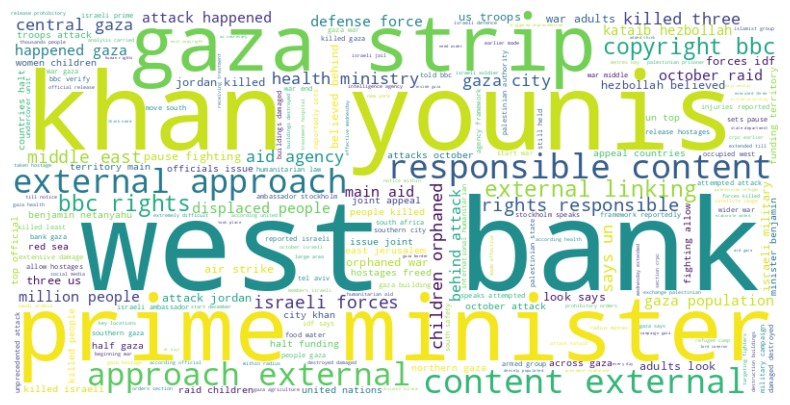

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
from gensim.models import Word2Vec

# Train Word2Vec model on each dictionary
word2vec_models = {}

for source, tokenized_articles in tokenized_dicts.items():
    model = Word2Vec([tokenized_articles], vector_size=100, window=5, min_count=1, workers=4)
    word2vec_models[source] = model

# Find 5 most similar words with 'economy' in each dictionary
for source, model in word2vec_models.items():
    similar_words = model.wv.most_similar('war', topn=5)
    print(f"{source} - Similar words with 'war': {similar_words}")


Business Insider - Similar words with 'war': [('night', 0.3189409673213959), ('background', 0.29267844557762146), ('display', 0.2816805839538574), ('spokesperson', 0.27876025438308716), ('experienced', 0.2775470018386841)]
TIME - Similar words with 'war': [('food', 0.4354916512966156), ('theory', 0.3917715847492218), ('populations', 0.356428861618042), ('percentof', 0.3335982859134674), ('bullet', 0.32446712255477905)]
Telegraph - Similar words with 'war': [('israeli', 0.6901981234550476), ('people', 0.6637016534805298), ('military', 0.6286309361457825), ('gaza', 0.624344527721405), ('court', 0.619587779045105)]
StatesMan - Similar words with 'war': [('gaza', 0.9218995571136475), ('law', 0.9040326476097107), ('government', 0.8981812000274658), ('netanyahu', 0.8980081081390381), ('voters', 0.8900251388549805)]
BBC - Similar words with 'war': [('gaza', 0.6964634656906128), ('un', 0.6858299970626831), ('israeli', 0.6649380326271057), ('says', 0.633463978767395), ('even', 0.630383253097534

In [ ]:
# Combine all tokenized articles for a global Word2Vec model
global_model = Word2Vec([all_tokens], vector_size=100, window=5, min_count=1, workers=4)

# Find 5 most similar words with 'economy' across all dictionaries
x = "currency"
global_similar_words = global_model.wv.most_similar(x, topn=10)
print(f"Global - Similar words with '{x}': {global_similar_words}")


Global - Similar words with 'currency': [('reportedmake', 0.354928195476532), ('restrained', 0.34412094950675964), ('unifying', 0.33808720111846924), ('uncounted', 0.33672186732292175), ('murphy', 0.3347676694393158), ('data', 0.33471187949180603), ('gave', 0.332221657037735), ('utensils', 0.3313843011856079), ('used', 0.3205620050430298), ('none', 0.3173070251941681)]


In [ ]:
# Combine all tokenized articles for a global Word2Vec model
global_model = Word2Vec([all_tokens], vector_size=100, window=5, min_count=1, workers=4)

# Find 5 most similar words with 'economy' across all dictionaries
x = "aid"
global_similar_words = global_model.wv.most_similar(x, topn=10)
print(f"Global - Similar words with '{x}': {global_similar_words}")


Global - Similar words with 'aid': [('red', 0.3770776689052582), ('country', 0.3604189455509186), ('soil', 0.3368084132671356), ('led', 0.334746390581131), ('egg', 0.3254319429397583), ('head', 0.3237995505332947), ('roared', 0.31942078471183777), ('post', 0.3190286457538605), ('failure', 0.31801652908325195), ('sprawling', 0.3174068033695221)]


In [ ]:
# Combine all tokenized articles for a global Word2Vec model
global_model = Word2Vec([all_tokens], vector_size=100, window=5, min_count=1, workers=4)

# Find 5 most similar words with 'economy' across all dictionaries
x = "trade"
global_similar_words = global_model.wv.most_similar(x, topn=10)
print(f"Global - Similar words with '{x}': {global_similar_words}")

Global - Similar words with 'trade': [('opposition', 0.3786373436450958), ('violence', 0.3778747618198395), ('celling', 0.3572699725627899), ('fatah', 0.34634658694267273), ('jabalia', 0.34469807147979736), ('kitchenware', 0.3328206241130829), ('gulf', 0.33187660574913025), ('situation', 0.32944726943969727), ('motion', 0.3210437297821045), ('tanks', 0.3193790316581726)]


In [ ]:
# Combine all tokenized articles for a global Word2Vec model
global_model = Word2Vec([all_tokens], vector_size=100, window=5, min_count=1, workers=4)

# Find 5 most similar words with 'economy' across all dictionaries
x = "defense"
global_similar_words = global_model.wv.most_similar(x, topn=10)
print(f"Global - Similar words with '{x}': {global_similar_words}")

Global - Similar words with 'defense': [('emigration', 0.35900282859802246), ('poised', 0.3529335856437683), ('spirit', 0.3426029682159424), ('f', 0.33671244978904724), ('wearing', 0.3359626233577728), ('relief', 0.3234429359436035), ('unpaid', 0.31946036219596863), ('whereextremist', 0.3155680000782013), ('marginalized', 0.30897071957588196), ('shia', 0.29911109805107117)]
